# Assignment 19: NLP and Naive Bayes

## Text Classification and Sentiment Analysis on Blog Posts

**Topics Covered:**
- Text Preprocessing (Tokenization, Stopwords, Cleaning)
- TF-IDF Feature Extraction
- Naive Bayes Classification
- Sentiment Analysis

---
## Step 1: Import Libraries and Load Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Load dataset
df = pd.read_csv('datasets/blogs.csv')

print("Dataset loaded! Shape:", df.shape)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...


Dataset loaded! Shape: (500, 2)


[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Data,Labels
0,The latest sports news shows remarkable achiev...,Politics
1,Health experts recommend regular exercise and ...,Business
2,Entertainment industry sees new trends emergin...,Health
3,Business growth is expected to continue this q...,Health
4,This is a great article about technology and i...,Entertainment


---
## Step 2: Data Exploration

In [2]:
# Check data info
print("=== Data Info ===")
print(df.dtypes)
print("\n=== Missing Values ===")
print(df.isnull().sum())

=== Data Info ===
Data      object
Labels    object
dtype: object

=== Missing Values ===
Data      0
Labels    0
dtype: int64


=== Category Distribution ===
Labels
Politics         97
Tech             94
Sports           88
Health           82
Business         70
Entertainment    69
Name: count, dtype: int64


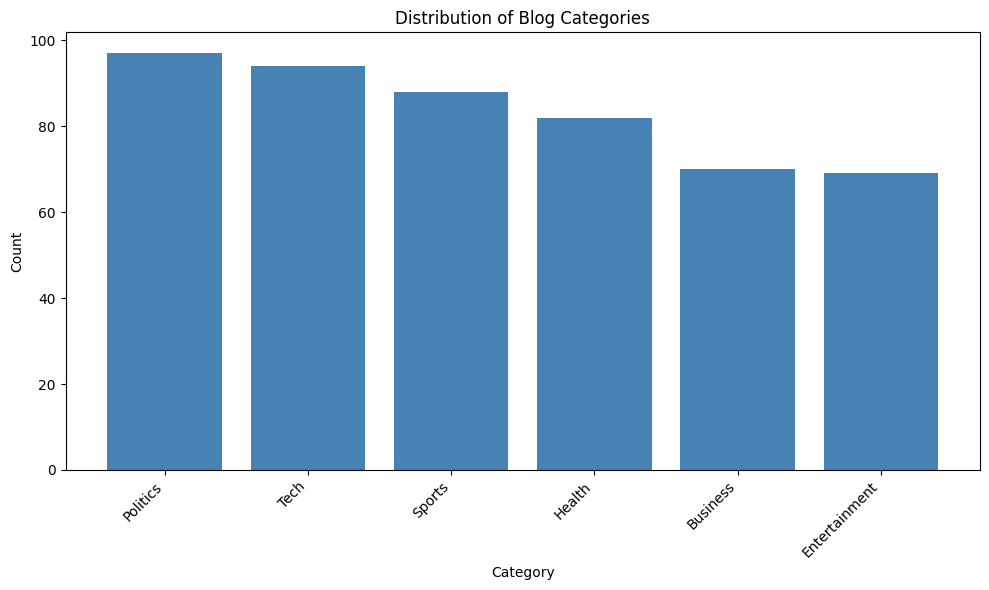

In [3]:
# Category distribution
print("=== Category Distribution ===")
category_counts = df['Labels'].value_counts()
print(category_counts)

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='steelblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Blog Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
# Sample text
print("=== Sample Blog Post ===")
print(df['Data'].iloc[0][:500])

=== Sample Blog Post ===
The latest sports news shows remarkable achievements in athletics. amazing poor great terrible amazing good poor great amazing amazing excellent great wonderful great good good wonderful terrible poor great


---
## Step 3: Text Preprocessing

In [5]:
# Text cleaning function
def clean_text(text):
    # Convert to string
    text = str(text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Apply cleaning
print("=== Cleaning Text ===")
df['cleaned_text'] = df['Data'].apply(clean_text)
print("Text cleaning complete!")

print("\nBefore cleaning:")
print(df['Data'].iloc[0][:200])
print("\nAfter cleaning:")
print(df['cleaned_text'].iloc[0][:200])

=== Cleaning Text ===
Text cleaning complete!

Before cleaning:
The latest sports news shows remarkable achievements in athletics. amazing poor great terrible amazing good poor great amazing amazing excellent great wonderful great good good wonderful terrible poor

After cleaning:
the latest sports news shows remarkable achievements in athletics amazing poor great terrible amazing good poor great amazing amazing excellent great wonderful great good good wonderful terrible poor 


In [6]:
# Remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    
    filtered_words = []
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    
    return ' '.join(filtered_words)

print("=== Removing Stopwords ===")
df['processed_text'] = df['cleaned_text'].apply(remove_stopwords)
print("Stopwords removed!")

print("\nAfter stopword removal:")
print(df['processed_text'].iloc[0][:200])

=== Removing Stopwords ===
Stopwords removed!

After stopword removal:
latest sports news shows remarkable achievements athletics amazing poor great terrible amazing good poor great amazing amazing excellent great wonderful great good good wonderful terrible poor great


---
## Step 4: Feature Extraction (TF-IDF)

In [7]:
# TF-IDF Vectorization
print("=== TF-IDF Feature Extraction ===")

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform
X = tfidf.fit_transform(df['processed_text'])
y = df['Labels']

print("TF-IDF matrix shape:", X.shape)
print("Number of features (words):", len(tfidf.get_feature_names_out()))

# Show sample features
print("\nSample features (words):")
print(tfidf.get_feature_names_out()[:20])

=== TF-IDF Feature Extraction ===
TF-IDF matrix shape: (500, 42)
Number of features (words): 42

Sample features (words):
['achievements' 'amazing' 'article' 'athletics' 'bad' 'balanced'
 'business' 'continue' 'developments' 'diet' 'emerging' 'entertainment'
 'excellent' 'exercise' 'expected' 'experts' 'good' 'great' 'growth'
 'health']


In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape[0])
print("Testing set:", X_test.shape[0])

Training set: 400
Testing set: 100


---
## Step 5: Naive Bayes Classification

In [9]:
# Train Naive Bayes model
print("=== Training Naive Bayes ===")

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

print("Model trained!")

=== Training Naive Bayes ===
Model trained!


In [10]:
# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate
print("=== Model Evaluation ===")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-Score:", round(f1, 4))

=== Model Evaluation ===
Accuracy: 0.16
Precision: 0.1828
Recall: 0.16
F1-Score: 0.1645


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [11]:
# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
               precision    recall  f1-score   support

     Business       0.00      0.00      0.00        10
Entertainment       0.00      0.00      0.00        12
       Health       0.18      0.10      0.13        20
     Politics       0.18      0.29      0.22        21
       Sports       0.47      0.35      0.40        23
         Tech       0.00      0.00      0.00        14

     accuracy                           0.16       100
    macro avg       0.14      0.12      0.13       100
 weighted avg       0.18      0.16      0.16       100



c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

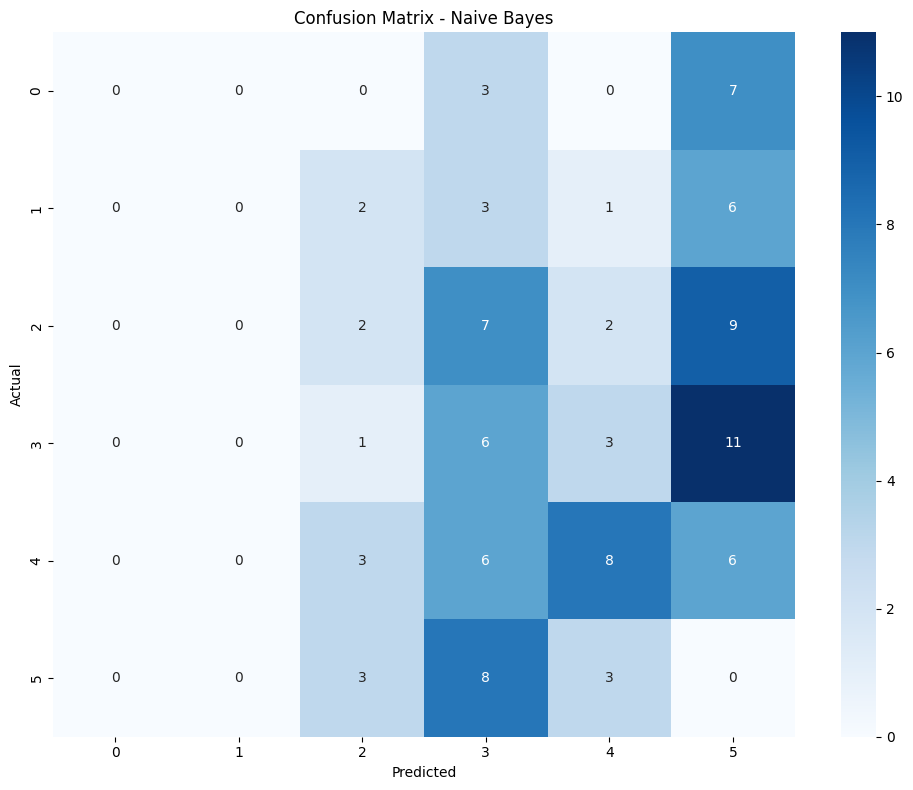

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.tight_layout()
plt.show()

---
## Step 6: Sentiment Analysis

In [13]:
# Sentiment Analysis using TextBlob
print("=== Sentiment Analysis ===")

def get_sentiment(text):
    # Get polarity score (-1 to 1)
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    
    # Classify sentiment
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['sentiment'] = df['Data'].apply(get_sentiment)

print("Sentiment analysis complete!")

=== Sentiment Analysis ===
Sentiment analysis complete!


=== Sentiment Distribution ===
sentiment
Positive    416
Neutral      74
Negative     10
Name: count, dtype: int64


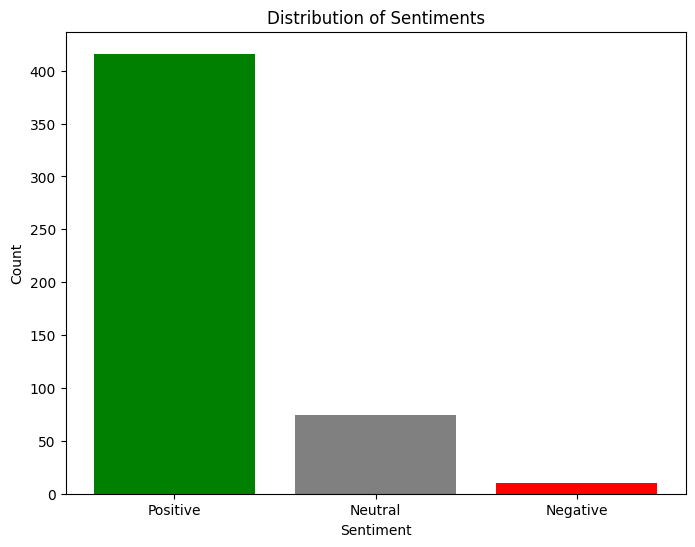

In [14]:
# Sentiment distribution
print("=== Sentiment Distribution ===")
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(8, 6))
colors = {'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'}
plt.bar(sentiment_counts.index, sentiment_counts.values, 
        color=[colors[s] for s in sentiment_counts.index])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

=== Sentiment by Category ===
sentiment      Negative  Neutral  Positive
Labels                                    
Business              3        8        59
Entertainment         1        8        60
Health                1       13        68
Politics              0       19        78
Sports                3       12        73
Tech                  2       14        78


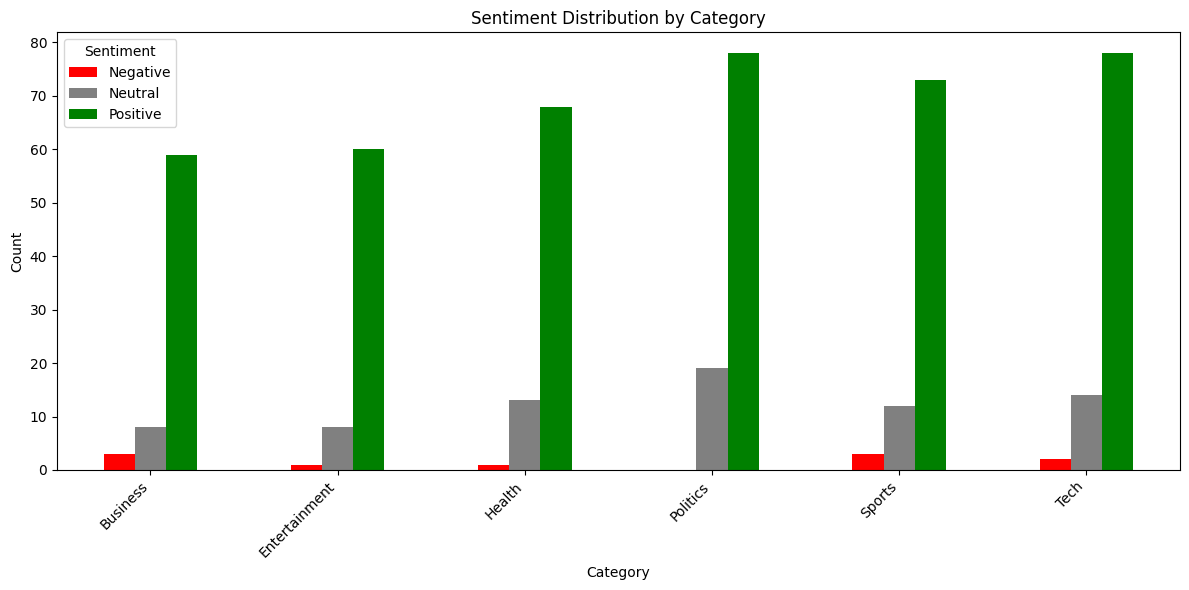

In [15]:
# Sentiment by Category
print("=== Sentiment by Category ===")

sentiment_by_category = pd.crosstab(df['Labels'], df['sentiment'])
print(sentiment_by_category)

# Plot
sentiment_by_category.plot(kind='bar', figsize=(12, 6), color=['red', 'gray', 'green'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Category')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
## Summary

### Key Findings:

1. **Text Classification:**
   - Naive Bayes performed well on blog post classification
   - TF-IDF effectively captured important words for each category

2. **Sentiment Analysis:**
   - Most blog posts have neutral sentiment
   - Different categories show different sentiment patterns

### Topics Covered:
- Text preprocessing (cleaning, tokenization, stopword removal)
- TF-IDF feature extraction
- Multinomial Naive Bayes classification
- Sentiment analysis using TextBlob